# [CalTeach Fall 2022] Avocado Analysis

**Curriculum designed by**: Lynn Nguyen

**Notebook Developed By:** Abigail Yu, Jonathan Ferrari

### Learning Outcomes

In this notebook, you will learn:
- how to create a null & alternative hypothesis.
- how to understand, perform, and analyze results of a _t-test_ using data, with and without a calculator.
- how to analyze a p-value.

### Table of Contents
1. [Jupyter Notebook Structure](#-1) <br>
1. [Introduction](#0) <br>
1. [What is a t-test?](#1) <br>
1. [Background on t-tests](#2) <br>
1. [The first step of a t-test](#3) <br>
1. [p-value](#4) <br>
1. [Performing a t-test without a calculator](#5) <br>
1. [Performing a t-test with a calculator](#6) <br>
1. [Finding $t$](#7) <br>
1. [Visualizing the results](#8) <br>
1. [Analyze the p-value](#9) <br>
1. [Conclusion](#10) <br>
1. [Feedback Form](#11)<br>

-------------------------------------------------------------------

# 0. Jupyter Notebook Structure <a id='-1'></a>

### Cell Types
A notebook is composed of rectangular sections called **cells**. There are 2 kinds of cells: markdown and code. 
- A **markdown cell**, such as this one, contains text. 
- A **code cell** contains code in Python, a programming language that we will be using with all of our data science modules in this class. You can select any cell by clicking it once.
    - Code cells can also contain code in other languages like Julia, or R: both of which can also be used in data analysis

### Running Cells
To "run" a code cell (i.e. tell the computer to perform the programmed instructions in the cell), select it and then,
- Press `Shift` + `Enter` to run the cell and move to the following cell
- Press `Command/Control` + `Enter` to run the cell but stay on the same cell
    - This can be used repeatedley to re-run the same process
- Click the Run button in the toolbar at the top of the screen. 

### Results and Outputs of a Cell
When you run a code cell, a number of things can happen, depending on the type and contents of the cell:
1. If the cell is a markdown cell, the text will be rendered according to the structure (_Markdown_, _HTML_, etc.)
2. If the cell is a code cell, the result of the last line in the cell will be shown
    - This output may be text, a number, a picture, or a visualization

If a code cell is running, you will see an asterisk (\*) appear in the square brackets to the left of the cell. Once the cell has finished running, a number will replace the asterisk and any output from the code will appear under the cell.

Let's try it! **Run the cell below to see the output.** Feel free to play around with the code -- try changing 'World' to your name.

In [4]:
print("Hello World!") # Run the cell by using one of the methods we mentioned above!

Hello World!


### Comments
You'll notice that many code cells contain lines of blue text that start with a `#`. These are ***comments***. Comments often contain helpful information about what the code does or what you are supposed to do in the cell. The leading `#` tells the computer to ignore whatever text follows it.

### Editing the Notebook

You can change the text in a markdown cell by clicking it twice. Text in markdown cells is written in [**Markdown**](https://daringfireball.net/projects/markdown/), a formatting language for plain text, so you may see some funky symbols should you try and edit a markdown cell we've already written. Once you've made changes to a markdown cell, you can exit editing mode by running the cell the same way you'd run a code cell.

<blockquote>
    <div class="alert alert-warning">
        <b>
            Try double-clicking on this text to see what some Markdown formatting looks like.
        </b>
    </div>
</blockquote>

In [7]:
url = "https://raw.githubusercontent.com/ds-modules/CalTeach-FA22/main/avocado/avocado.py"
import urllib.request
urllib.request.urlretrieve(url, "avocado.py")
from avocado import *
%matplotlib inline

# 1. Introduction <a id='0'></a>

Avocados. From guacamole to morning toast, avocados have risen in popularity immensely. They are used in salads and salsas, spring rolls and sandwiches – they are even snuck into chocolatey brownies! But of course, if more and more people want a product, what do you think will happen to the price?

Let’s make a hypothesis of what you expect the price of avocados to look like overtime if more and more people continue to want them? In your hypothesis, include your:

**Claim:** “Avocado prices will rise/drop/stay the same/etc.”

**Explanation:** “because….”

Type below:

<code><b>Double-click to replace this and type your answer here!</b></code>

# 2. What is a t-test? <a id='1'></a>

How can we look at changes overtime? Well, luckily the Hass Avocado Board has an extensive national dataset of avocado prices (and more!) from 2015 and onwards.

Let’s take a look at a random sample of 50 avocado prices (ASP, or average selling price) in 2019 and 2022 from California.

Here's a random sample of 50 avocado prices in 2019:

In [8]:
samp_2019.head()

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
4290,Miami/Ft. Lauderdale,Weekly,2019-07-07 00:00:00,Organic,1.876089,5748.09,293.47,0.00,0.00,5038.82,0.0,0.0,0.0,415.80
3206,Baltimore/Washington,Weekly,2019-09-01 00:00:00,Organic,1.702893,52435.12,791.43,4144.15,3.43,46087.32,0.0,0.0,0.0,1408.79
5768,Great Lakes,Weekly,2019-12-08 00:00:00,Organic,1.437606,150435.17,6535.13,20304.09,0.00,44641.65,0.0,0.0,0.0,78954.31
5098,San Diego,Weekly,2019-01-20 00:00:00,Organic,1.924543,15402.19,2290.67,7049.67,0.00,4359.24,0.0,0.0,0.0,1702.60
2684,Great Lakes,Weekly,2019-08-18 00:00:00,Conventional,1.363272,3145647.37,583052.06,681293.73,181540.67,480046.80,0.0,0.0,0.0,1219714.10


And here's a random sample of 50 avocado prices in 2022:

In [9]:
samp_2022.head()

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
3253,Tampa,Weekly,2022-07-03 00:00:00,Organic,1.360740,65910.44,105.63,0.00,0.00,59530.21,NaN,NaN,NaN,6274.59
3915,Providence,Weekly,2022-08-14 00:00:00,Conventional,1.485207,82959.86,5865.68,53927.10,46.81,15218.99,NaN,NaN,NaN,7901.28
1010,Hartford/Springfield,Weekly,2022-03-06 00:00:00,Conventional,1.579247,308675.68,37227.39,184402.27,2153.63,75010.04,NaN,NaN,NaN,9882.34
1954,Hartford/Springfield,Weekly,2022-05-01 00:00:00,Conventional,1.506918,392880.00,75846.62,236413.77,614.46,70759.13,NaN,NaN,NaN,9245.63
1580,Seattle,Weekly,2022-04-17 00:00:00,Conventional,1.803577,532056.37,96289.39,37098.70,357.19,134913.99,NaN,NaN,NaN,263397.10


Here are some scatter plots representing data from the above tables!

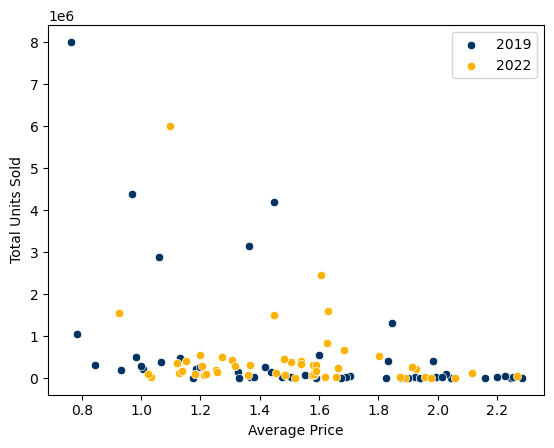

In [10]:
make_scatter();

What are some observations (trend, mean/median, variability/range, outliers, significant data points, etc.) you have about the data in **2019**?

<code><b>Double-click to replace this and type your answer here!</b></code>

What are some observations (trend, mean/median, variability/range, outliers, significant data points, etc.) you have about the data in **2022**?

<code><b>Double-click to replace this and type your answer here!</b></code>

What specific value(s) in each data set should we use to determine if there was a change overtime?

<code><b>Double-click to replace this and type your answer here!</b></code>

Looking at the dataset, what would you hypothesize? Do you think there is a change in price between the two years? In which direction? How confident are you and why?

<code><b>Double-click to replace this and type your answer here!</b></code>

# 3. Background on t-tests <a id='2'></a>
In most cases, when we look at two different data sets to compare, there may be some overlapping points. For example, even though the overall graph shows the price of avocados in 2022 being greater than the price of avocados in 2019, we still see some points in the 2022 graph that are less than points of the 2019 graph. If there is a lot of overlap, looking at a visual or single calculated value may not be enough!

In this case, it may be best to use a **two sample t-test**. A two sample t-test is a statistical test that can help us compare the means, or average, of the two dataset. T-tests have a specific criteria that the data must abide by to work:

The data has to be:
- independent – the data do not affect each other
- a randomly selected sample
- large... (sample size recommended to be over 30, otherwise, it MUST be normally distributed)
- ...but not too large (sample size is at MOST 10% of the total population)

Keep in note, we are using samples of the entire population. That is why we can use a t-test! Otherwise we would use a different test. In most cases, you will not be able to collect data about an entire population, so _t-tests are incredibly useful here!_

Remember, our question is: **Did the price of avocados increase from 2019 to 2022?**

# 4. The first step of a t-test <a id='3'></a>

The first t-test step is to create our null hypothesis ($H_0$) and alternative hypothesis ($H_a$).

- A **null hypothesis** is our assumption that says there is no difference between the two means. Typically, the format would follow $\mu_a = \mu_b$, where a and b are your identifying titles to separate the two samples and $\mu$ is the Greek letter Mu.
- The **alternative hypothesis** is what we want to test. Typically, the format would follow $\mu_a < \mu_b$, $\mu_a > \mu_b$, or $\mu_a \neq \mu_b$.

Write down what you think the null hypothesis and alternative hypothesis would be using the variables $\mu_{2019}$ and $\mu_{2022}$:

$H_0$: <code><b>Double-click to replace this and type your answer here!</b></code>

$H_a$: <code><b>Double-click to replace this and type your answer here!</b></code>

Let’s check if your hypotheses are correct!

$H_0$: $\mu_{2019} = \mu_{2022}$

$H_a$: $\mu_{2019} < \mu_{2022}$
- _Note that ($\mu_{2019} > \mu_{2022}$ would also be correct! The process to solve this is the same, but let’s follow using the first inequality._

# 5. p-value <a id='4'></a>

At the end, we will receive a **p-value**. That p-value is compared to the probability “limit,” helping us determine if we are able to reject our null hypothesis.

The “limit” is called the significance level, denoted as α. Typically, α is set to 0.05, but it can vary depending on the field of study. Essentially, α = 0.05 just means **there is a 5% risk that we reject the null hypothesis (or conclude that there is a significant change) even though there is actually no difference between the means (null hypothesis is actually true!)**.

So in the context of avocados, if we have a p-value that is lower than α = 0.05, we can assert with 95% confidence that _the prices of avocados from 2019 and 2022 are not the same_. That is, there is a 5% chance that the prices are the same, even though our calculations state otherwise.

For this problem, let’s set our α = 0.05.

There are two ways to perform a t-test with this data: with a calculator function and without a calculator function. Let’s look at without first:

# 6. Performing a t-test without a calculator <a id='5'></a>

We start by finding the means, standard deviations, and the count of each data sample. 

We can find the **mean** by adding up each of the values and dividing the sum by the count:

$$mean = \frac{\text{sum of the terms}}{\text{number of terms}}$$

**Standard deviation** for a sample is the square root of the sum of the square of each term subtracted by the mean divided by the number of terms minus one. That's a mouthful! Let’s look at the formula to understand this better:

$$s=\sqrt{\frac{\sum_{i=0}^n(x_{i}-\bar{x})^2}{n-1}}$$

where $x$ is the value, $\bar{x}$ is the mean of the value, and $n$ is the count (the number of data points you have in the sample).

All of these values can be determined manually through a calculator, or you can use the _2-Var Stats_ function under `[STAT]` on a TI-84 as you'll see in the following section.

# 7. Performing a t-test with a calculator <a id='6'></a>

To use a TI-84:
1. Press `[STAT]`.
2. Press `[ENTER]` or `[1]` to get into EDIT
3. Input your data into the lists. Each list should correspond to a sample.
4. Press `[STAT]` again.
5. Use the arrows to scroll over to CALC and hit `[2]` or select "2-Var Stats".
6. Set "Xlist" as one of your filled lists. Set "Ylist" as your other filled list. You can change the list by hitting `[2ND][LIST]` and scrolling down on NAMES to select your desired list.
7. Leave FreqList empty. 
8. Scroll to the bottom and hit **Calculate**.

You specifically want to record $\bar{x}$, $S_x$, $\bar{y}$, $S_y$, and $n$. Note that if the two samples are different sizes, then you can do two 1-Var Stats tests for each sample. Make sure to note $n_x$ and $n_y$.

Let the x-variables represent the data sample from 2019. Let the y-variables represent the data sample from 2022.

What did you get for each of the values?

$\bar{x}_{2019}$: <code><b>Double-click to replace this and type your answer here!</b></code>

$S_{2019}$: <code><b>Double-click to replace this and type your answer here!</b></code>

$\bar{x}_{2022}$: <code><b>Double-click to replace this and type your answer here!</b></code>

$S_{2022}$: <code><b>Double-click to replace this and type your answer here!</b></code>

$n_{2022}$: <code><b>Double-click to replace this and type your answer here!</b></code>

$n_{2019}$: <code><b>Double-click to replace this and type your answer here!</b></code>

Let’s check your work!

In [11]:
show_stats()

## 2019

$\bar{x}_{2019}$:

$1.561$

$S_{2019}$:

$0.435$

$n_{2019}$:

$50$

## 2022

$\bar{x}_{2022}$:

$1.498$

$S_{2022}$:

$0.311$

$n_{2022}$:

$50$

# 8. Finding $t$ <a id='7'></a>

Great job finding the main data statistics! Let’s use this information to help us form a t-test now!
The general formula to find the t-statistic is:

$$t=\frac{\bar{x_a}-\bar{x_b}}{\sqrt{\frac{s_a^2}{n_a}-\frac{s_b^2}{n_b}}}$$

In this case, we can rewrite the formula in terms of our own variables:

$$t=\frac{\bar{x_{2019}}-\bar{x_{2022}}}{\sqrt{\frac{s_{2019}^2-s_{2022}^2}{n}}}$$

<code><b>Double-click to replace this and type your answer here!</b></code>

Go ahead and plug in the values to see what you get:

$t$ = <code><b>Double-click to replace this and type your answer here!</b></code>

Let’s check our work again:

In [12]:
t, p = t_test("t")

## T-Test

$t$:

$0.824$

# 9. Visualizing the results <a id='8'></a>
We are almost there! Now we have to find the probability of the t-distribution of becoming more extreme than the t-statistic. Let’s visualize this!

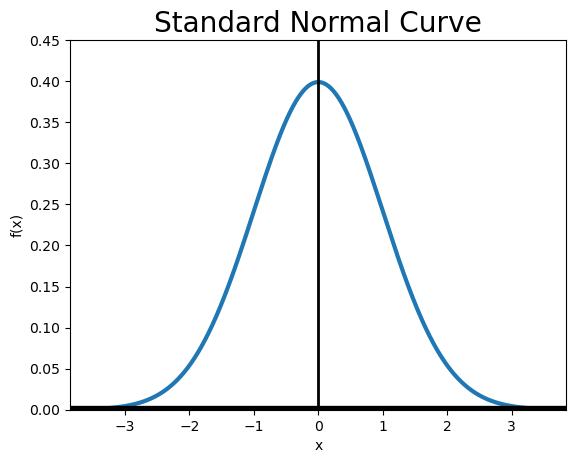

In [13]:
plot_normal()

This is a standard normal curve. The mean is at the middle line where $x=0$.

Let’s now try to graph where a generic t-statistic would land from both ends of the mean – let’s say t-statistic = 1. 

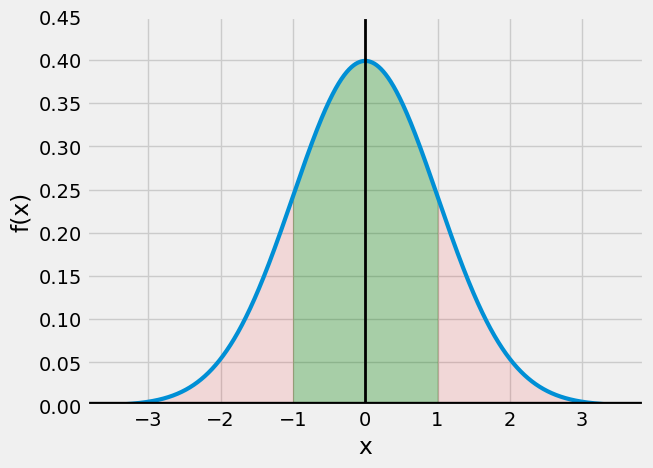

In [14]:
plot_t()

When we deal with finding the probability, we actually want to look at the tail(s) of the graph, so focus on the red areas instead of the green!

If we want to find the probability that:
- $\mu_a < \mu_b$: Find the probability of the left tail end.
- $\mu_a > \mu_b$: Find the probability of the right tail end.
- $\mu_a \neq \mu_b$: Find the probability of the left tail end and the right tail end (double the value).

Describe what portion of the normal curve you are wanting to find the probability of for our avocado problem! Make sure to include the t-statistic and whether you are looking at the left-hand tail, right-hand tail, or both.

<code><b>Double-click to replace this and type your answer here!</b></code>

The normal graph should look something like:

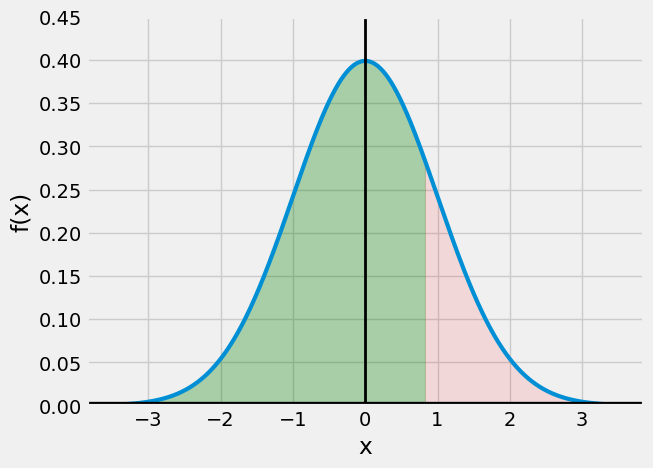

In [15]:
plot_t(t)

And you want to find the probability of the red portion!

So how do we find the probability? We can use a test in our calculators called tcdf!

To find the probability:
1. Press `[2ND][DISTR]`
2. Press `[6]` or scroll to "tdcf("
3. Enter your lower bound. If your lower bound is the end of the curve, put -1E99; to enter E, press `[2ND][EE]`).
4. Enter your upper bound. If your upper bound is the end of the curve, put 1E99; to enter E, press `[2ND][EE]`).
5. Enter the smallest sample size minus 1 as the df.
6. Hit `Paste`.

Determine the probability for our avocado data:

tcdf(`____`, `_____`, `_____`) = `______`

Check your work!

In [16]:
t, p = t_test("p")

## P-Value

$p$:

$0.412$

# 10. Analyze the p-value <a id='9'></a>
Great! We got our numbers and now it is time to interpret the data! Remember that significance level we talked about before? We are going to compare our probability, commonly known as **p-value**, to $\alpha$. There are two outcomes:

Fill in the _[bracketed]_ terms with your own words/calculations:
- p-value < $\alpha$
    - This is great! We can reject the null hypothesis and suggest the alternative hypothesis. 
    - "Since the p-value of _[p-value]_ is less than 0.05, we can reject the null hypothesis of no difference in favor of the alternative and conclude that, on average, _[describe Ha in words]_.”
- p-value > $\alpha$
    - Here, we cannot reject the null hypothesis! Note that we DO NOT accept the null hypothesis, it just means we cannot make a firm conclusion.
    - “Because the p-value of _[p-value]_ is larger than 0.05, we fail to reject the null hypothesis. There is not convincing evidence that _[describe Ha in words]_.”

With our p-value, analyze your results by comparing it to $\alpha$ = 0.05.

<code><b>Double-click to replace this and type your answer here!</b></code>

Check your work!

- p-value < $\alpha$
    - “Since the p-value of [p-value] is less than 0.05, we can reject the null hypothesis of no difference in favor of the alternative and conclude that, on average, the price of avocados in 2019 is less than the price of avocados in 2022. ”
- p-value > $\alpha$
    - Here, we cannot reject the null hypothesis! Note that we DO NOT accept the null hypothesis, it just means we cannot make a firm conclusion.
    - “Because the p-value of [p-value] is larger than 0.05, we fail to reject the null hypothesis. There is not convincing evidence that the price of avocados in 2019 is less than the price of avocados in 2022.”


And that's how you perform a t-test!

# Conclusion <a id='10'></a>

**Congratulations on finishing the notebook!** There was a lot of content but here's what you learned throughout this notebook:
- how to create a null & alternative hypothesis.
- how to understand, perform, and analyze results of a _t-test_ using data, with and without a calculator.
- how to analyze a p-value.

# Survey <a id='11'></a>

This survey is all anonymous. You are not required to answer any questions, but responses are highly encouraged! These answers will be used to study curriculum and how to improve (online) lessons.

- Grade:

<code><b>Double-click to replace this and type your answer here!</b></code>

- Have you taken or are you currently taking a statistics course: <code><b>YES / NO</b></code>


<code><b>Double-click to replace this and type your answer here!</b></code>

- What did you like about this lesson (topic, structure, etc.)?:

<code><b>Double-click to replace this and type your answer here!</b></code>

- What did you not like about this lesson (topic, structure, etc. / What would you like changed?):

<code><b>Double-click to replace this and type your answer here!</b></code>

- On a scale of 1-10, how effective was the lesson (How much information did you retain?):


<code><b>Double-click to replace this and type your answer here!</b></code>

- On a scale of (easy) 1-10 (hard), how would you rate the usability/ease of Jupyter Notebook in terms of this curriculum:

<code><b>Double-click to replace this and type your answer here!</b></code>

- On a scale of 1-10, how likely are you to recommend this lesson to others:

<code><b>Double-click to replace this and type your answer here!</b></code>

# Feedback Form <a id='13'></a>

<div class="alert alert-info">
<b> We encourage student to fill out the following feedback form to share your experience with this Module notebook. This feedback form will take no longer than 5 minutes. At UC Berkeley Data Science Undergraduate Studies Modules, we appreciate all feedback to improve the learning of students and experience utilizing Jupyter Notebooks for Data Science Education: </b> 
</div>

# [UC Berkeley Data Science Feedback Form](https://forms.gle/hipxf2uFw5Ud4Hyn8)